In [1]:
from utility_dfcutter import *
from utility_dfplotter import *
import utility_common as common
%matplotlib inline

In [2]:
class PlotterManager:
    def __init__(self,selection,nbjet, njet=None):
        self.selection = selection
        self.nbjet = nbjet
        self.njet  = njet
        self._setConfiguration() 
        
    def getDataFrameList(self, variation=''):
        dfList = []
        for name in ['B','C','D','E','F','G','H']:
            dfList.append(DFCutter(self.selection,self.nbjet,'data2016'+name, self.njet, folderOfPickles = "pickles_reduceEle27").getDataFrame())
        return dfList
        
    def _setConfiguration(self):
        self.mcsgQueryList = []
        self.labelList = ['16B: 5.8/fb',
                          '16C: 2.6/fb',
                          '16D: 4.2/fb',
                          '16E: 3.6/fb',
                          '16F: 2.9/fb',
                          '16G: 6.2/fb',
                          '16H: 6.1/fb']
        self.colorList = ['#e0301e','#eb8c00','gold','springgreen','#49feec','deepskyblue','mediumpurple']
        
        
def makeAPlot(df_list, label_list, color_list, v,a,b,step,xl):
    
    
    mybin         = np.arange(a,b,step)
    variable_list = [mc[v].values for mc in df_list]
    weight_list   = [mc['eventWeight'].values for mc in df_list]

    plt.rc('figure',facecolor='w')
    fig, axes = plt.subplots(2, 1, sharex=True, 
                             gridspec_kw={'height_ratios':[3,1]},
                             figsize=(6,6))
    fig.subplots_adjust(hspace=0)
    
    # upper plot
    ax = axes[0]
    mc =  ax.hist(variable_list, 
                  label   = label_list,
                  color   = color_list,
                  bins = mybin, lw=0, alpha=1, 
                  histtype='stepfilled',
                  stacked=True
                 )
    mc = mc[0][-1]
    
    ax.text(0.04*b+0.96*a, 1.35*mc.max(), r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
    ax.text(0.04*b+0.96*a, 1.2*mc.max(), r'$e +jets$ channel $(n_j\geq 4,n_b= 2 )$',style='italic',fontsize='12')
    
    ax.grid(True,linestyle='--',alpha=0.5)
    ax.set_ylim(0,1.5*mc.max())
    ax.legend()
    ax.set_title('L=35.9/fb (13TeV)',loc='right')
    
    # lower plot
    ax = axes[1]
    lumin_list  = [5.747,2.573,4.242,3.633,2.905,6.156,6.094]
    weight_list = [mc['eventWeight'].values/lumin_list[i] for i,mc in enumerate(df_list)]

    mc =  ax.hist(variable_list, 
                  weights  = weight_list,
                  label   = label_list,
                  color   = color_list,
                  bins = mybin, lw=1, alpha=1, 
                  histtype='step'
                 )
    mc = mc[0][-1]
    ax.set_ylabel('event per /fb',fontsize='10')
    
    ax.set_xlim(a, b)
    ax.set_ylim(0,1.2*mc.max())
    ax.grid(True,linestyle='--',alpha=0.5)
    
    ax.set_xlabel(xl,fontsize='12')
        

In [3]:
selection,nbjet = 'etau','==1'
pmng = PlotterManager(selection,nbjet)
df_list = pmng.getDataFrameList()
label_list = pmng.labelList
color_list = pmng.colorList

baseDir = common.getBaseDirectory()
#pp = pd.read_csv(baseDir+'python/plotterItemTables/itemTable_{}.csv'.format(selection))
#pp = pd.read_csv(baseDir+'python/plotterItemTables/itemTable_{}.csv'.format('emu'))
# v,a,b,step,xl = 'lepton2_eta',-3,3,0.1,'lepton1_eta'
# makeAPlot(df_list,label_list,color_list,v,a,b,step,xl)

In [ ]:
for index, row in pp.iterrows():

    v,a,b,step,xl = row['var'],row['lower'],row['upper'],row['step'],row['xlabel']

    makeAPlot(df_list,label_list,color_list,v,a,b,step,xl)
    plt.savefig(baseDir+'plots/data_kinematics/{}/1b/2017_{}_1b_{}.pdf'.format(selection,selection,v))
    plt.close()

In [4]:
mean,std = [],[]

lumin_list  = [5.747,2.573,4.242,3.633,2.905,6.156,6.094]
for (df,lumin) in zip(df_list,lumin_list):
    n = df.size
    nVar = df.size
    rate = n/lumin
    rateVar = rate**2 * (nVar/n**2 + 0.025**2)
    mean.append(rate)
    std.append(rateVar**0.5)
    print("{:6.1f}+/-{:6.1f}".format(rate,rateVar**0.5))

df = DFCutter(selection,nbjet,'data2016', folderOfPickles = "pickles_reduceEle27").getDataFrame()
aveAll = df.size/31.4

23736.9+/- 596.9
17154.3+/- 436.6
21657.7+/- 546.1
18630.9+/- 471.2
18667.8+/- 473.5
22141.0+/- 556.8
21842.8+/- 549.3


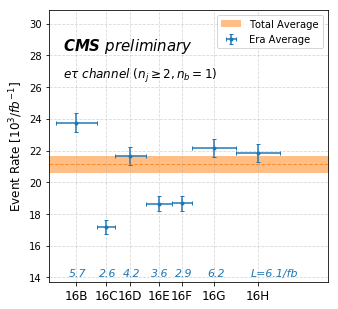

In [5]:
lumin_list = np.array(lumin_list)
xstd = lumin_list/2
xpos = np.cumsum(lumin_list) - xstd

ypos = np.array([i/1000 for i in mean])
ystd = np.array([i/1000 for i in std ])
plt.figure(facecolor='w',figsize=(5,5))


ave = aveAll/1000
aveStd = ave*0.025


plt.fill_between(np.arange(-2,40),ave+aveStd,ave-aveStd, alpha=0.5, color='C1',lw=0,label='Total Average')
plt.axhline(ave, color='C1',lw=1, alpha=0.8, linestyle="--")

plt.errorbar(xpos,ypos,yerr=ystd,xerr=xstd, color='C0',fmt='.', capsize=2,label='Era Average')
plt.ylabel(r'Event Rate [$10^3/fb^{-1}$]',fontsize=12)
plt.xticks(xpos,['16B','16C','16D','16E','16F','16G','16H'],fontsize=12)
plt.xlim(-1,38)

ylower, yupper = 0.8*ypos.min(),1.3*ypos.max()
yrange = yupper-ylower
plt.ylim(ylower,yupper)

plt.grid(linestyle='--',alpha=0.5)

for i in range(len(xpos)):
    string = r'{:3.1f}'.format(lumin_list[i])
    if i == len(xpos)-1:
        string = 'L='+string
        string += r'/fb'
    plt.text(xpos[i]-1, ylower+yrange*0.02, string, color='C0', style='italic', fontsize='11')


plt.text(1, yupper-yrange*0.15, r'CMS $preliminary$',style='italic',fontsize='15',fontweight='bold')
plt.text(1, yupper-yrange*0.25, r'$e\tau$ channel $(n_j\geq 2,n_b=1 )$',style='italic',fontsize='12')

plt.legend()
plt.savefig(baseDir+'plots/data_reduceEle27_{}.png'.format(selection),dpi=300)


428406.40668523678

In [45]:
ypos.min()

339.94558880684025